# Final 

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import scipy as sp
import random
from numpy import linalg as LA

# Just some color options for seaborn plots
sns.set(style="darkgrid")
sns.set_palette("Dark2")


# 1) Test accuracy

In [34]:
def loglik(w, X, y):
    z = X.dot(w)
    return (z.dot(y - 1) - sum(np.log(1 + np.exp(-z))))

def gradLL(w, X, y):
    h = np.exp(-X.dot(w))
    return ((y - 1) + h / (1 + h)).dot(X)


In [286]:
# load and scale data

data = np.load("mnist.npz")
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

# Define two classes
c3 = 3
c5 = 5

X = x_train.reshape((x_train.shape[0], 28*28))
keep = (y_train == c3) | (y_train == c5)
X = X[keep,:] / 255
y = y_train[keep].astype(float)

y = (y == c5).astype(float)

n = X.shape[0]

# Add a column of ones to X
X = np.concatenate((np.ones(n).reshape(n, 1), X), axis = 1)

d = X.shape[1]

print(X.shape, y.shape)

(3851, 785) (3851,)


In [240]:

w = np.random.rand(d)

logL = []

delta = 0.0004
epsilon = 0.02
gnorm = 1
maxIter = 10000
i = 0

while (gnorm > epsilon) & (i < maxIter):
    grad = gradLL(w, X, y)
    gnorm = np.linalg.norm(grad)
    logL = np.append(logL, loglik(w, X, y))
    if i%200 == 0:
        print(logL[i], "(log-lik) : ", gnorm, "(grad)")
    i += 1
    w += delta * grad



-118738.64217295269 (log-lik) :  14935.237993362633 (grad)
-378.1286258491782 (log-lik) :  35.82827830327301 (grad)
-319.2139159517137 (log-lik) :  21.32026779100607 (grad)
-290.9600176019758 (log-lik) :  16.76535785293054 (grad)
-271.80290008821066 (log-lik) :  14.336361932955805 (grad)
-257.2557027250441 (log-lik) :  12.704795474243372 (grad)
-245.56867805223192 (log-lik) :  11.513822485223423 (grad)
-235.80771174280744 (log-lik) :  10.60766724846068 (grad)
-227.4203392219806 (log-lik) :  9.890544831799835 (grad)
-220.06275845773962 (log-lik) :  9.303226219785163 (grad)
-213.50876933762993 (log-lik) :  8.809021452470802 (grad)
-207.60149518639446 (log-lik) :  8.384430568878875 (grad)
-202.22718714909934 (log-lik) :  8.013746148487737 (grad)
-197.30033792231188 (log-lik) :  7.6860210986571476 (grad)
-192.75478076691434 (log-lik) :  7.393334250290109 (grad)
-188.53810545503075 (log-lik) :  7.129764238577669 (grad)
-184.60800258700328 (log-lik) :  6.890758843819259 (grad)
-180.929780366

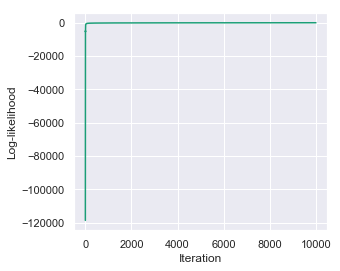

In [241]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.plot(logL)
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.show()

In [261]:
X_test = x_test.reshape((x_test.shape[0], 28*28))
keep = (y_test == c3) | (y_test == c5)
X_test = X_test[keep,:] / 255
y_t = y_test[keep].astype(float)

y_t = (y_t == c5).astype(float)

n_test = X_test.shape[0]

# Add a column of ones to X
X_test = np.concatenate((np.ones(n_test).reshape(n_test, 1), X_test), axis = 1)

y_prob = 1 / (1 + np.exp(-X_test.dot(w)))

print("Test accuracy:", 1 - sum(np.around(y_prob) != y_t)/n_test)

Test accuracy: 0.953732912723449


# 2) 

In [377]:
def aSigmoid(t):
    return np.exp(-t)/(1+np.exp(-t))

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def dsigmoid(t):
    return np.exp(-t) / (1 + np.exp(-t))**2

def relu(t):
    return np.maximum(0, t)

def drelu(t):
    return np.clip(np.sign(t), a_min = 0, a_max = None)


def layer1(x, w1):
    return sigmoid(x.dot(w1))

def layer2(z,w2):
    n = z.shape[0]
    z = np.concatenate((np.ones(n).reshape(n, 1), z), axis = 1)
    return sigmoid(z.dot(w2))
    
def feedforward(x,w1,w2):
    return layer2(layer1(x, w1), w2)

def gradW1(w1, w2, X, y):
    new_w2 = w2[1:]
    Z = layer1(X, w1)
    t = Z.dot(new_w2)
    first = ((y-1) + aSigmoid(t)).reshape(len(y),1).dot(new_w2.reshape(1,len(new_w2)))/len(y)

    second = sigmoid(X.dot(w1))

    return X.T.dot(np.multiply(first,second))

def gradW2(w1, w2, Z, y):
    return ((y-1) + aSigmoid(Z.dot(w2))).dot(Z)/len(y)


# 3)

In [418]:
def grad(m):
    w1 = np.random.uniform(low=-0.5, high=0.5, size=(d, m))
    w2 = np.random.uniform(low=-0.5, high=0.5, size=(m+1, ))
    logLike = []
    maxIter = 1000
    delta1 = 0.4
    delta2 = 0.4
    
    for i in range(maxIter):
        Z = layer1(X, w1)
        n = Z.shape[0]
        Z = np.concatenate((np.ones(n).reshape(n, 1), Z), axis = 1)
        logLike.append(loglik(w2, Z, y))
        grad2 = gradW2(w1, w2, Z, y)
        w2 = w2 + delta2 * grad2
        
        grad1 = gradW1(w1, w2, X, y)
        w1 = w1 + delta1 * grad1
    
    
    return np.array(logLike)/n, w1, w2


# 4)

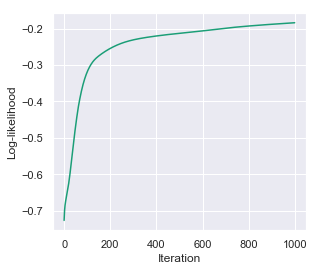

In [426]:
loglike2,w1_2,w2_2 = grad(2)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.plot(loglike2)
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.show()

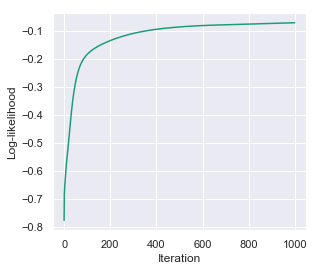

In [420]:
loglike10,w1_10,w2_10 = grad(10)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.plot(loglike10)
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.show()

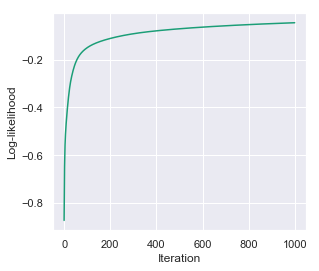

In [432]:
loglike40,w1_40,w2_40 = grad(40)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.plot(loglike40)
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.show()

In [476]:
print("m=2 iteration 1000 log-likelihood: ", loglike2[999])
print("m=10 iteration 1000 log-likelihood: ", loglike10[999])
print("m=40 iteration 1000 log-likelihood: ", loglike40[999])

m=2 iteration 1000 log-likelihood:  -0.18375207405078822
m=10 iteration 1000 log-likelihood:  -0.07196596030624566
m=40 iteration 1000 log-likelihood:  -0.045376767124128865


**Runtime seems to be slightly longer because my computer fan was getting louder when m increases. Log-likelihood converges faster with larger m.**

In [447]:
X_test = x_test.reshape((x_test.shape[0], 28*28))
keep = (y_test == c3) | (y_test == c5)
X_test = X_test[keep,:] / 255
y_t2 = y_test[keep].astype(float)

# y_t = (y_t == c5).astype(float)

n_test = X_test.shape[0]

# Add a column of ones to X
X_test = np.concatenate((np.ones(n_test).reshape(n_test, 1), X_test), axis = 1)
p = feedforward(X_test,w1_2,w2_2).reshape(len(y_t2),1)
correct=0
for i in range(n_test):
    if p[i] > 0.5:
        if y_t2[i]==5:
            correct += 1
    elif p[i] <= 0.5:
        if y_t2[i]==3:
            correct += 1
acc = correct/(n_test)*100
print (correct, "dignoses out of a total of",n_test,"tests were accurate.")
print("Accuracy for m = 2 is: ", acc, "%.")


1756 dignoses out of a total of 1902 tests were accurate.
Accuracy for m = 2 is:  92.32386961093586 %.


In [448]:
p10 = feedforward(X_test,w1_10,w2_10).reshape(len(y_t2),1)
correct=0
for i in range(n_test):
    if p10[i] > 0.5:
        if y_t2[i]==5:
            correct += 1
    elif p10[i] <= 0.5:
        if y_t2[i]==3:
            correct += 1
acc = correct/(n_test)*100
print (correct, "dignoses out of a total of",n_test,"tests were accurate.")
print("Accuracy for m = 10 is: ", acc, "%.")

1843 dignoses out of a total of 1902 tests were accurate.
Accuracy for m = 10 is:  96.89800210304942 %.


In [449]:
p40 = feedforward(X_test,w1_40,w2_40).reshape(len(y_t2),1)
correct=0
for i in range(n_test):
    if p40[i] > 0.5:
        if y_t2[i]==5:
            correct += 1
    elif p40[i] <= 0.5:
        if y_t2[i]==3:
            correct += 1
acc = correct/(n_test)*100
print (correct, "dignoses out of a total of",n_test,"tests were accurate.")
print("Accuracy for m = 40 is: ", acc, "%.")

1854 dignoses out of a total of 1902 tests were accurate.
Accuracy for m = 40 is:  97.47634069400631 %.


**Compare to logistic regression we did in hw5, the accuray seems to be lower. But it could be because of the value of m and the number of iterations.**

# 5)

In [477]:
def relu(t):
    return np.maximum(0, t)

def drelu(t):
    return np.clip(np.sign(t), a_min = 0, a_max = None)


def re_layer1(x, w1):
    return relu(x.dot(w1))
    
def newFeedForward(x,w1,w2):
    return layer2(re_layer1(x, w1), w2)

def re_gradW1(w1, w2, X, y):
    new_w2 = w2[1:]
    Z = re_layer1(X, w1)
    t = Z.dot(new_w2)
    first = ((y-1) + aSigmoid(t)).reshape(len(y),1).dot(new_w2.reshape(1,len(new_w2)))/len(y)

    second = sigmoid(X.dot(w1))

    return X.T.dot(np.multiply(first,second))

def re_grad(m):
    w1 = np.random.uniform(low=-0.5, high=0.5, size=(d, m))
    w2 = np.random.uniform(low=-0.5, high=0.5, size=(m+1, ))
    logLike = []
    maxIter = 1000
    delta1 = 0.4
    delta2 = 0.4
    
    for i in range(maxIter):
        Z = layer1(X, w1)
        n = Z.shape[0]
        Z = np.concatenate((np.ones(n).reshape(n, 1), Z), axis = 1)
        logLike.append(loglik(w2, Z, y))
        grad2 = gradW2(w1, w2, Z, y)
        w2 = w2 + delta2 * grad2
        
        grad1 = gradW1(w1, w2, X, y)
        w1 = w1 + delta1 * grad1
    
    
    return np.array(logLike)/n, w1, w2

    

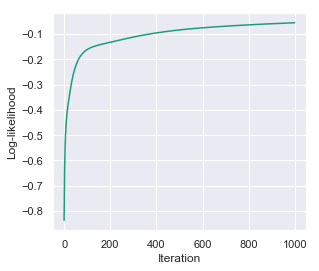

In [472]:
re_loglike,re_w1,re_w2 = re_grad(40)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.plot(re_loglike)
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.show()

In [475]:
print("Relu iteration 1000 log-likelihood: ", re_loglike[999])

Relu iteration 1000 log-likelihood:  -0.05519668614401626


In [474]:
p_relu = feedforward(X_test,re_w1,re_w2).reshape(len(y_t2),1)
correct=0
for i in range(n_test):
    if p_relu[i] > 0.5:
        if y_t2[i]==5:
            correct += 1
    elif p_relu[i] <= 0.5:
        if y_t2[i]==3:
            correct += 1
acc = correct/(n_test)*100
print (correct, "dignoses out of a total of",n_test,"tests were accurate.")
print("Accuracy for m = 40 is: ", acc, "%.")

1842 dignoses out of a total of 1902 tests were accurate.
Accuracy for m = 40 is:  96.84542586750788 %.


**Runtime seems to be faster than sigmoid, but the convergence rate and accuracy is lower compare to sigmoid activation.**